In [1]:
import os

db_file = os.path.abspath("db.json")

In [2]:
from pymatgen import Structure

struct_si = Structure.from_file("si.cif")

In [3]:
from pymatgen.io.vasp.sets import MPRelaxSet

vis = MPRelaxSet(struct_si, force_gamma=True)

In [4]:
from atomate.vasp.fireworks import OptimizeFW

fw1 = OptimizeFW(struct_si, vasp_input_set=vis, vasp_cmd=None, db_file=db_file)

for task in fw1.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [5]:
from atomate.vasp.fireworks import StaticFW

fw2 = StaticFW(struct_si, vasp_input_set=vis, vasp_cmd=None, db_file=db_file, 
               parents=[fw1])

for task in fw2.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspStaticFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [6]:
from atomate.vasp.fireworks import NonSCFFW

fw3 = NonSCFFW(struct_si, vasp_cmd=None, db_file=db_file, 
               parents=[fw2], mode="uniform")

for task in fw3.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspNSCFFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [7]:
fw4 = NonSCFFW(struct_si, vasp_cmd=None, db_file=db_file, 
               parents=[fw2], mode="line")

for task in fw4.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspNSCFFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [8]:
from fireworks import Workflow

fws = [fw1, fw2, fw3, fw4]

wf = Workflow(fws)

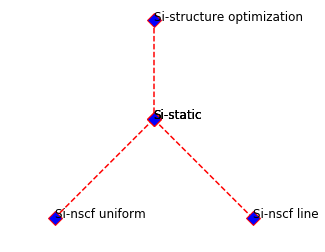

In [9]:
from fireworks.utilities.fw_utilities import plot_wf

plot_wf(wf)

In [10]:
from helper_functions import electronic_structure_simulator

wf = electronic_structure_simulator(wf)

In [11]:
from fireworks import LaunchPad

lp = LaunchPad()
lp.reset("", require_password=False)

2017-08-05 14:36:46,250 INFO Performing db tune-up
2017-08-05 14:36:48,889 INFO LaunchPad was RESET.


In [12]:
lp.add_wf(wf)

2017-08-05 14:36:51,667 INFO Added a workflow. id_map: {-4: 1, -3: 2, -2: 3, -1: 4}


{-4: 1, -3: 2, -2: 3, -1: 4}

In [13]:
from fireworks import FWorker
from fireworks.core.rocket_launcher import rapidfire

rapidfire(lp)

2017-08-01 10:21:31,859 INFO Created new dir /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-01-17-21-31-819419
2017-08-01 10:21:31,859 INFO Launching Rocket
2017-08-01 10:21:31,887 INFO RUNNING fw_id: 4 in directory: /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-01-17-21-31-819419
2017-08-01 10:21:31,893 INFO Task started: {{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}}.
2017-08-01 10:21:31,911 INFO Task completed: {{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}} 
2017-08-01 10:21:31,916 INFO Task started: {{atomate.vasp.firetasks.run_calc.RunVaspFake}}.
2017-08-01 10:21:31,951 INFO atomate.vasp.firetasks.run_calc RunVaspFake: verified inputs successfully
2017-08-01 10:21:31,963 INFO atomate.vasp.firetasks.run_calc RunVaspFake: ran fake VASP, generated outputs
2017-08-01 10:21:31,964 INFO Task completed: {{atomate.vasp.firetasks.run_calc.RunVaspFake}} 
2017-08-01 10:21:31,965 INFO Task started: {{atomate.common.firetasks.glue_ta

2017-08-01 10:21:37,351 INFO Task started: {{atomate.vasp.firetasks.run_calc.RunVaspFake}}.
2017-08-01 10:21:37,382 INFO atomate.vasp.firetasks.run_calc RunVaspFake: verified inputs successfully
2017-08-01 10:21:37,392 INFO atomate.vasp.firetasks.run_calc RunVaspFake: ran fake VASP, generated outputs
2017-08-01 10:21:37,393 INFO Task completed: {{atomate.vasp.firetasks.run_calc.RunVaspFake}} 
2017-08-01 10:21:37,395 INFO Task started: {{atomate.common.firetasks.glue_tasks.PassCalcLocs}}.
2017-08-01 10:21:37,397 INFO Task completed: {{atomate.common.firetasks.glue_tasks.PassCalcLocs}} 
2017-08-01 10:21:37,398 INFO Task started: {{atomate.vasp.firetasks.parse_outputs.VaspToDb}}.
2017-08-01 10:21:37,399 INFO atomate.vasp.firetasks.parse_outputs PARSING DIRECTORY: /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-01-17-21-35-447458
2017-08-01 10:21:37,400 INFO atomate.vasp.drones Getting task doc for base dir :/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-

/home/km/Software/matproj/pymatgen/pymatgen/symmetry/bandstructure.py:60: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


2017-08-01 10:21:37,750 INFO atomate.vasp.drones Post-processing dir:/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-01-17-21-35-447458
2017-08-01 10:21:37,751 WARNING atomate.vasp.drones Transformations file does not exist.
2017-08-01 10:21:37,761 INFO atomate.vasp.drones Post-processed /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-01-17-21-35-447458
2017-08-01 10:21:37,789 INFO atomate.utils.database Inserting km-UX305LA:/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-01-17-21-35-447458 with taskid = 36
2017-08-01 10:21:37,805 INFO atomate.vasp.firetasks.parse_outputs Finished parsing with task_id: 36
2017-08-01 10:21:37,807 INFO Task completed: {{atomate.vasp.firetasks.parse_outputs.VaspToDb}} 
2017-08-01 10:21:37,828 INFO Rocket finished


In [13]:
from atomate.vasp.database import VaspCalcDb

vasp_db = VaspCalcDb.from_db_file(db_file)

In [16]:
from helper_functions import get_task_id

dos_task_id = get_task_id(lp, "Si-nscf uniform")
bs_task_id = get_task_id(lp, "Si-nscf line")
print(dos_task_id, bs_task_id)

35 36


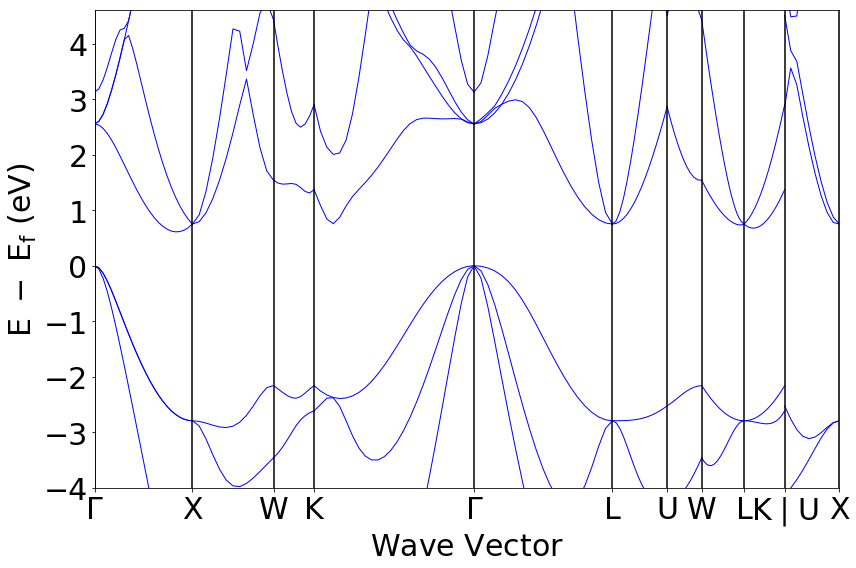

In [17]:
from pymatgen.electronic_structure.plotter import BSPlotter

bs = vasp_db.get_band_structure(bs_task_id)

plotter = BSPlotter(bs)
plt = plotter.get_plot()
plt.show()

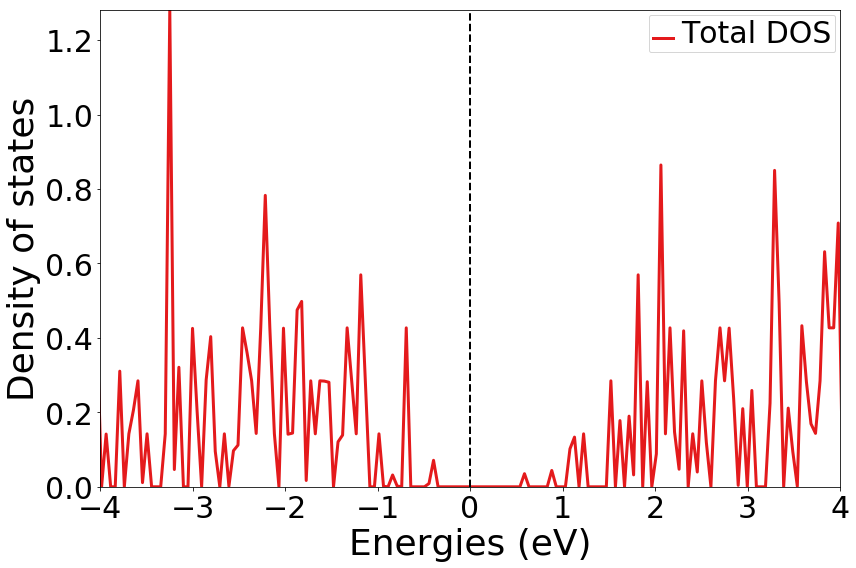

In [18]:
from pymatgen.electronic_structure.plotter import DosPlotter

dos = vasp_db.get_dos(dos_task_id)

plotter = DosPlotter()
plotter.add_dos("Total DOS", dos)
plt = plotter.get_plot(xlim=[-4,4])
plt.show()